# Project 2

In this project, you will implement the exploratory analysis plan developed in Project 1. This will lay the groundwork for our our first modeling exercise in Project 3.


### Step 1: Load the python libraries you will need for this project 

In [112]:
#imports
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as pl
import numpy as np
import seaborn as sns
import scipy
%matplotlib inline

### Step 2: Read in your data set 

In [19]:
#Read in data from source 
df_raw = pd.read_csv("../assets/admissions.csv")
print df_raw.head()

   admit    gre   gpa  prestige
0      0  380.0  3.61       3.0
1      1  660.0  3.67       3.0
2      1  800.0  4.00       1.0
3      1  640.0  3.19       4.0
4      0  520.0  2.93       4.0


In [20]:
df=df_raw.copy()

## Questions
#### Question 1. How many observations are in our dataset? 


In [21]:
df.count()

admit       400
gre         398
gpa         398
prestige    399
dtype: int64

Answer: 

#### Question 2. Create a summary table

In [22]:
df.describe()

,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,NaN,NaN,NaN
50%,0.000000,NaN,NaN,NaN
75%,1.000000,NaN,NaN,NaN
max,1.000000,800.000000,4.00000,4.000000


#### Question 3. Why would GRE have a larger STD than GPA?

Answer: There is a greater range of test scores than GPAs. Furthermore the deviation from the mean is larger among the test scores than the GPA. Also, the GRE and GPA are on different scales 260 to 800 and 0 to 4 respectively

#### Question 4. Drop data points with missing data


In [23]:
print df.count()
print df.dropna().count()

admit       400
gre         398
gpa         398
prestige    399
dtype: int64
admit       397
gre         397
gpa         397
prestige    397
dtype: int64


#### Question 5. Confirm that you dropped the correct data. How can you tell? 

Answer: The above counts confirm that I dropped any 'na' data. I was able to confirm removal of invalid data using before and after counts. 

#### Question 6. Create box plots for GRE and GPA

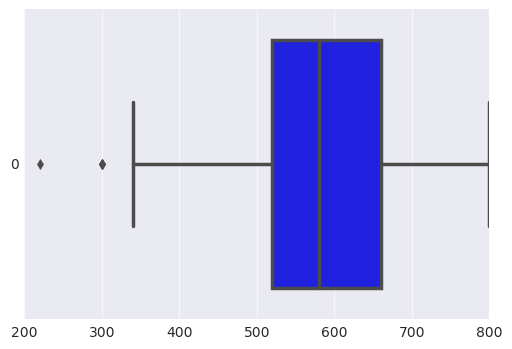

In [39]:
#boxplot 1
sns.set_style("darkgrid")
ax=sns.boxplot(data=df['gre'],linewidth=2.5, orient="h")

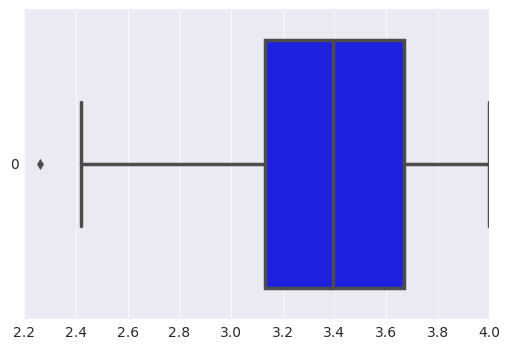

In [70]:
#boxplot 2
sns.set_style("darkgrid")
ax2=sns.boxplot(data=df['gpa'],linewidth=2.5, orient="h")
#ax2=sns.swarmplot(data=df['gpa'],linewidth=.01, orient="h",color=".25")

#### Question 7. What do this plots show?

Answer: The box plot show five summary statistics the median, the 1st and third quartiles and the lower and outer limits. The median shows that 50% of all of the data points collected fall under this 2nd quartile while the other 50% are above this quartile. The lower and upper limits are calculated by multiplying the interquartile range by 1.5 and adding or subtracting from the third and first quartiles respecitvely. Any points falling outside of these limits can be designated as outliers.

#### Question 8. Describe each distribution 

-0.150126665946
115.628513092


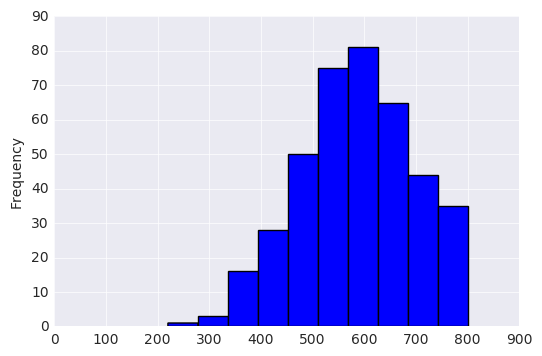

In [148]:
# plot the distribution of each variable 
df['gre'].plot(kind='hist',xlim=(0,900))
print df['gre'].skew()
print df['gre'].std()

-0.211765490335
0.380630380057


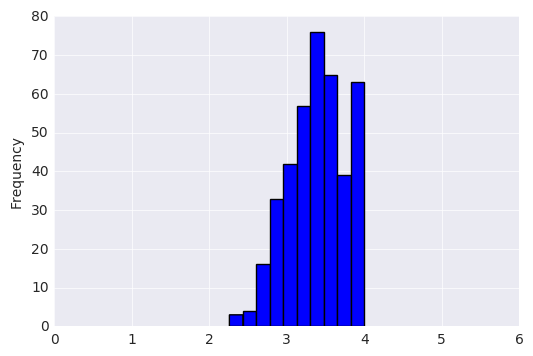

In [151]:
ax=df['gpa'].plot(kind='hist',xlim=(0,6.0))

print df['gpa'].skew()
print df['gpa'].std()

0.093662653554
0.945332604072


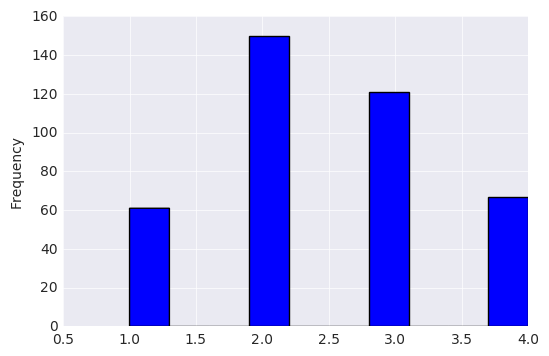

In [147]:
df['prestige'].plot(kind='hist')
print df['prestige'].skew()
print df['prestige'].std()

#### Question 9.  If our model had an assumption of a normal distribution would we meet that requirement? 

Answer: Yes. All of the histogramps show a normal distribution

#### Question 10.  Does this distribution need correction? If so, why? How? 

Answer:  If the distribution needed correction a transformation could be executed, generally the transformation is logorithmic

#### Question 11. Which of our variables are potentially colinear? 

In [99]:
# create a correlation matrix for the data
df.corr()

,admit,gre,gpa,prestige
admit,1.000000,0.182919,0.175952,-0.241355
gre,0.182919,1.000000,0.382408,-0.124533
gpa,0.175952,0.382408,1.000000,-0.059031
prestige,-0.241355,-0.124533,-0.059031,1.000000


#### Question 12. What did you find?

Answer: The correlation matrix shows that none of the variables are very correlated while some show a weak positively or negative correlation none truly point to a variable that is a major contributor to graduate school admissions.

### Question 13. Write an analysis plan for exploring the association between grad school admissions rates and prestige of undergraduate schools.

Answer: Generally it's a assumed that the the prestige of one's undergraduate school is a primary determinant of admissions into graduate programs. However after reviewing the data I want to challenge this notion. My analysis will look at two variables admissions and prestige to determine if it is a determinant for graduate school admissions. Subsequently we should look into other factors that might play a role into admissions like grades and test scores.

#### Question 14. What is your hypothesis? 

Answer: 

        h0: Graduate school admissions is largely determined by undergraduate school/program prestige. 
        Ha: Graduate school admissions is not determined by undergraduate school/program prestige. 

## Knowledge Review Questions

1. What is test error and train error?
2. What are ways to mitigate a situation where you have low train error but high test error?
3. What are some of the parameters you can tweak to get a better fit in ordinary linear regression?
4. What package would you use to explore these parameters easily and find the best model?
5. What is the difference between Lasso and Ridge regression?
    6a. When do you use which?
6. Bonus: Explore alternatives to dropping obervations with missing data

Advanced Bonus:
1. What makes Lasso regression do what it does to the coefficients?
2. How do you deal with multi-colinearity when performing linear regression?
3. What is the "distance" formula in KNN? I.e. how does KNN account for distance to the k neighbours when predicting the class?

## Knowledge Review Question Answers
1. Test error is the amount of error when the training set is applied to the test set. Training error is the error of the average model after multiple folds of the training set have been run in determining the best fit model. The best fit training model is the model with the lowest error.

2. If the test error is high we need to improve our training set. Often times the test error is high because the training set has not been developed to appropriately test future circumstances. Therefore we can improve the training model and fit through K-fold cross validation

3. To improve the OLS model we can tweak the alpha parameters that are used in ridge and lasso regression. The alpha parameters penalize model complexity

4. We can use the grid search package to easily find the best fit model.

5. We use lasso regression regularization when we want less features (sparse model) and we use ridge when we want sufficient R^2 but are Ok with more features. The lasso regression adds extra weight to the sum of the coefficients whereas ridge adds weight to the sum of the square of the coefficients.

6. Bonus: Instead of dropping observations we can replace the missing values with medians

Advanced Bonus

1. The lasso regression is a regularization method that adds extra weight to the sum of the coefficients. The regularization is optimized via an alpha parameter via cross validation. We use this regularization method when we want less features when it determines that 2 or more are corrlelated with one another.

2. Multicollinearity is managed through the use of dummy variables. These dummy variables ensure that only one instance of a set of related values is selected and applied to the model. For example in the bike sharing dataset in class there are multiple types of weather. All of them are correlated to bike rental counts but they can't all be applied at the same time. Therefore we set the weather types up as dummy variables in a boolean fashion. This will break each row into its own instance where 1 type of weather is valid and other kinds of weather are not.

3. With KNN there are two type of measures from K. One is distance and the other is uniform. In the case of distance it looks at a cluster and basically determines if a point is close to that distance or not.